# Step 1 - 6 Standard Counters (Poisson 25)

In [1]:
import SimFunctions
import SimRNG
import SimClasses
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def Service_Time(Item_Num):
    # service time ~ normal distribution
    ServiceTime = abs(np.random.normal(1/10*Item_Num + 3))
    return ServiceTime

# number of items ~ poisson distribution
def ItemNum1():
    return np.random.poisson(25)

def Arrival():
    SimFunctions.Schedule(Calendar,"Arrival",SimRNG.Expon(MeanTBA, 1))
    Customer = SimClasses.Entity()
    NumQueue_list = []
    for i in range(6):
        NumQueue_list.append(TheQueues[i].NumQueue())   
    min_index = NumQueue_list.index(min(NumQueue_list))
    TheQueues[min_index].Add(Customer)

    if TheResources[min_index].Busy == 0:
        TheResources[min_index].Seize(1)
        SimFunctions.Schedule(Calendar,"EndOfService"+str(min_index+1),Service_Time(ItemNum1()))

def EndOfService1():
    global Total_Customer1
    Total_Customer1 += 1
    DepartingCustomer1 = Queue1.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer1.CreateTime)
    if Queue1.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService1",Service_Time(ItemNum1()))
    else:
        Server1.Free(1)
        
def EndOfService2():
    global Total_Customer2
    Total_Customer2 += 1
    DepartingCustomer2 = Queue2.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer2.CreateTime)
    if Queue2.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService2",Service_Time(ItemNum1()))
    else:
        Server2.Free(1)
    
def EndOfService3():
    global Total_Customer3
    Total_Customer3 += 1
    DepartingCustomer3 = Queue3.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer3.CreateTime)
    if Queue3.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService3",Service_Time(ItemNum1()))
    else:
        Server3.Free(1)
    
def EndOfService4():
    global Total_Customer4
    Total_Customer4 += 1
    DepartingCustomer4 = Queue4.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer4.CreateTime)
    if Queue4.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService4",Service_Time(ItemNum1()))
    else:
        Server4.Free(1)
    
def EndOfService5():
    global Total_Customer5
    Total_Customer5 += 1
    DepartingCustomer5 = Queue5.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer5.CreateTime)
    if Queue5.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService5",Service_Time(ItemNum1()))
    else:
        Server5.Free(1)
    
def EndOfService6():
    global Total_Customer6
    Total_Customer6 += 1
    DepartingCustomer6 = Queue6.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer6.CreateTime)
    if Queue6.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService6",Service_Time(ItemNum1()))
    else:
        Server6.Free(1)
        
ZSimRNG = SimRNG.InitializeRNSeed()
Queue1 = SimClasses.FIFOQueue()
Queue2 = SimClasses.FIFOQueue()
Queue3 = SimClasses.FIFOQueue()
Queue4 = SimClasses.FIFOQueue()
Queue5 = SimClasses.FIFOQueue()
Queue6 = SimClasses.FIFOQueue()

Wait = SimClasses.DTStat()
Server1 = SimClasses.Resource()
Server2 = SimClasses.Resource()
Server3 = SimClasses.Resource()
Server4 = SimClasses.Resource()
Server5 = SimClasses.Resource()
Server6 = SimClasses.Resource()

Calendar = SimClasses.EventCalendar()

TheCTStats = []
TheDTStats = []
TheQueues = []
AllWaits = []
TheResources = []

TheDTStats.append(Wait)
TheQueues.append(Queue1)
TheQueues.append(Queue2)
TheQueues.append(Queue3)
TheQueues.append(Queue4)
TheQueues.append(Queue5)
TheQueues.append(Queue6)
TheResources.append(Server1)
TheResources.append(Server2)
TheResources.append(Server3)
TheResources.append(Server4)
TheResources.append(Server5)
TheResources.append(Server6)

Server1.SetUnits(1)
Server2.SetUnits(1)
Server3.SetUnits(1)
Server4.SetUnits(1)
Server5.SetUnits(1)
Server6.SetUnits(1)

MeanTBA = 1.0 #a customer will arrive every 1 min
T = 840 # 8AM-10PM=14hrs
n = 50
mean = 0
Sum = 0
re = []
repsNum = []

for reps in range(2,n+1,1):
    Total_Customer1 = 0
    Total_Customer2 = 0
    Total_Customer3 = 0
    Total_Customer4 = 0
    Total_Customer5 = 0
    Total_Customer6 = 0

    SimFunctions.SimFunctionsInit(Calendar,TheQueues,TheCTStats,TheDTStats,TheResources)
    SimFunctions.Schedule(Calendar,"Arrival",SimRNG.Expon(MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"EndSimulation",T)
    NextEvent = Calendar.Remove()
    SimClasses.Clock = NextEvent.EventTime

    if NextEvent.EventType == "Arrival":
        Arrival()
    elif NextEvent.EventType == "EndOfService1":
        EndOfService1()
    elif NextEvent.EventType == "EndOfService2":
        EndOfService2()
    elif NextEvent.EventType == "EndOfService3":
        EndOfService3()
    elif NextEvent.EventType == "EndOfService4":
        EndOfService4()
    elif NextEvent.EventType == "EndOfService5":
        EndOfService5()
    elif NextEvent.EventType == "EndOfService6":
        EndOfService6()

    while NextEvent.EventType != "EndSimulation":
        NextEvent = Calendar.Remove()
        SimClasses.Clock = NextEvent.EventTime
        if NextEvent.EventType == "Arrival":
            Arrival()
        elif NextEvent.EventType == "EndOfService1":
            EndOfService1()
        elif NextEvent.EventType == "EndOfService2":
            EndOfService2()
        elif NextEvent.EventType == "EndOfService3":
            EndOfService3()
        elif NextEvent.EventType == "EndOfService4":
            EndOfService4()
        elif NextEvent.EventType == "EndOfService5":
            EndOfService5()
        elif NextEvent.EventType == "EndOfService6":
            EndOfService6()
    AllWaits.append(Wait.Mean())
    diff = np.mean(AllWaits[-1]) - mean
    mean = mean + diff / reps
    Sum = Sum + diff * (np.mean(AllWaits[0:reps]) - mean)
    std = math.sqrt(Sum / (reps - 1))
    repsNum.append(reps)
    re.append(1.96*std / math.sqrt(reps) / np.mean(AllWaits[0:reps]))
print('The mean waiting time is:', mean)

The mean waiting time is: 10.293945894703532


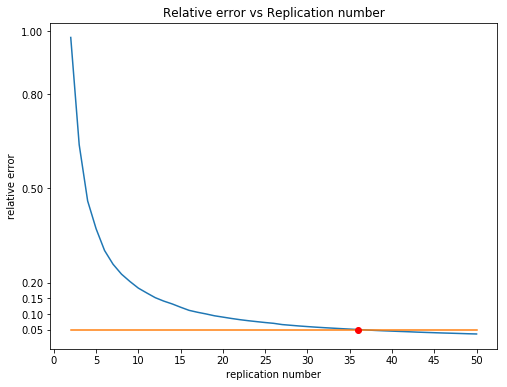

The proper replication number to control the relative error within 5% is:  36


In [3]:
horizon = []
for i in range(n-1):
    horizon.append(0.05)
    
plt.figure(figsize=(8,6))
plt.plot(repsNum, re, '-')
plt.plot(repsNum, horizon, '-')
plt.xlabel('replication number')
plt.ylabel('relative error')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.yticks([0.05,0.1,0.15,0.2,0.5,0.8,1.0])
plt.title('Relative error vs Replication number')
idx = np.argwhere(np.diff(np.sign(np.array(re) - np.array(horizon)))).flatten()
plt.plot(np.array(repsNum)[idx], np.array(re)[idx], 'ro')
plt.show()
print('The proper replication number to control the relative error within 5% is: ', np.array(repsNum)[idx][0])

# Binomial n=40, p=0.625

In [4]:
def Service_Time(Item_Num):
    # service time ~ normal distribution
    ServiceTime = abs(np.random.normal(1/10*Item_Num + 3))
    return ServiceTime

# number of items ~ binomial distribution
def ItemNum2():
    return np.random.binomial(40, 0.625)

def Arrival():
    SimFunctions.Schedule(Calendar,"Arrival",SimRNG.Expon(MeanTBA, 1))
    Customer = SimClasses.Entity()
    NumQueue_list = []
    for i in range(6):
        NumQueue_list.append(TheQueues[i].NumQueue())   
    min_index = NumQueue_list.index(min(NumQueue_list))
    TheQueues[min_index].Add(Customer)

    if TheResources[min_index].Busy == 0:
        TheResources[min_index].Seize(1)
        SimFunctions.Schedule(Calendar,"EndOfService"+str(min_index+1),Service_Time(ItemNum2()))

def EndOfService1():
    global Total_Customer1
    Total_Customer1 += 1
    DepartingCustomer1 = Queue1.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer1.CreateTime)
    if Queue1.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService1",Service_Time(ItemNum2()))
    else:
        Server1.Free(1)
        
def EndOfService2():
    global Total_Customer2
    Total_Customer2 += 1
    DepartingCustomer2 = Queue2.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer2.CreateTime)
    if Queue2.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService2",Service_Time(ItemNum2()))
    else:
        Server2.Free(1)
    
def EndOfService3():
    global Total_Customer3
    Total_Customer3 += 1
    DepartingCustomer3 = Queue3.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer3.CreateTime)
    if Queue3.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService3",Service_Time(ItemNum2()))
    else:
        Server3.Free(1)
    
def EndOfService4():
    global Total_Customer4
    Total_Customer4 += 1
    DepartingCustomer4 = Queue4.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer4.CreateTime)
    if Queue4.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService4",Service_Time(ItemNum2()))
    else:
        Server4.Free(1)
    
def EndOfService5():
    global Total_Customer5
    Total_Customer5 += 1
    DepartingCustomer5 = Queue5.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer5.CreateTime)
    if Queue5.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService5",Service_Time(ItemNum2()))
    else:
        Server5.Free(1)
    
def EndOfService6():
    global Total_Customer6
    Total_Customer6 += 1
    DepartingCustomer6 = Queue6.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer6.CreateTime)
    if Queue6.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService6",Service_Time(ItemNum2()))
    else:
        Server6.Free(1)
        
ZSimRNG = SimRNG.InitializeRNSeed()
Queue1 = SimClasses.FIFOQueue()
Queue2 = SimClasses.FIFOQueue()
Queue3 = SimClasses.FIFOQueue()
Queue4 = SimClasses.FIFOQueue()
Queue5 = SimClasses.FIFOQueue()
Queue6 = SimClasses.FIFOQueue()

Wait = SimClasses.DTStat()
Server1 = SimClasses.Resource()
Server2 = SimClasses.Resource()
Server3 = SimClasses.Resource()
Server4 = SimClasses.Resource()
Server5 = SimClasses.Resource()
Server6 = SimClasses.Resource()

Calendar = SimClasses.EventCalendar()

TheCTStats = []
TheDTStats = []
TheQueues = []
AllWaits = []
TheResources = []

TheDTStats.append(Wait)
TheQueues.append(Queue1)
TheQueues.append(Queue2)
TheQueues.append(Queue3)
TheQueues.append(Queue4)
TheQueues.append(Queue5)
TheQueues.append(Queue6)
TheResources.append(Server1)
TheResources.append(Server2)
TheResources.append(Server3)
TheResources.append(Server4)
TheResources.append(Server5)
TheResources.append(Server6)

Server1.SetUnits(1)
Server2.SetUnits(1)
Server3.SetUnits(1)
Server4.SetUnits(1)
Server5.SetUnits(1)
Server6.SetUnits(1)

MeanTBA = 1.0 #a customer will arrive every 1 min
T = 840 # 8AM-10PM=14hrs
n = 50
mean = 0
Sum = 0
re = []
repsNum = []

for reps in range(2,n+1,1):
    Total_Customer1 = 0
    Total_Customer2 = 0
    Total_Customer3 = 0
    Total_Customer4 = 0
    Total_Customer5 = 0
    Total_Customer6 = 0

    SimFunctions.SimFunctionsInit(Calendar,TheQueues,TheCTStats,TheDTStats,TheResources)
    SimFunctions.Schedule(Calendar,"Arrival",SimRNG.Expon(MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"EndSimulation",T)
    NextEvent = Calendar.Remove()
    SimClasses.Clock = NextEvent.EventTime

    if NextEvent.EventType == "Arrival":
        Arrival()
    elif NextEvent.EventType == "EndOfService1":
        EndOfService1()
    elif NextEvent.EventType == "EndOfService2":
        EndOfService2()
    elif NextEvent.EventType == "EndOfService3":
        EndOfService3()
    elif NextEvent.EventType == "EndOfService4":
        EndOfService4()
    elif NextEvent.EventType == "EndOfService5":
        EndOfService5()
    elif NextEvent.EventType == "EndOfService6":
        EndOfService6()

    while NextEvent.EventType != "EndSimulation":
        NextEvent = Calendar.Remove()
        SimClasses.Clock = NextEvent.EventTime
        if NextEvent.EventType == "Arrival":
            Arrival()
        elif NextEvent.EventType == "EndOfService1":
            EndOfService1()
        elif NextEvent.EventType == "EndOfService2":
            EndOfService2()
        elif NextEvent.EventType == "EndOfService3":
            EndOfService3()
        elif NextEvent.EventType == "EndOfService4":
            EndOfService4()
        elif NextEvent.EventType == "EndOfService5":
            EndOfService5()
        elif NextEvent.EventType == "EndOfService6":
            EndOfService6()
    AllWaits.append(Wait.Mean())
    diff = np.mean(AllWaits[-1]) - mean
    mean = mean + diff / reps
    Sum = Sum + diff * (np.mean(AllWaits[0:reps]) - mean)
    std = math.sqrt(Sum / (reps - 1))
    repsNum.append(reps)
    re.append(1.96*std / math.sqrt(reps) / np.mean(AllWaits[0:reps]))
print('The mean waiting time is:', mean)

The mean waiting time is: 10.166740016191925


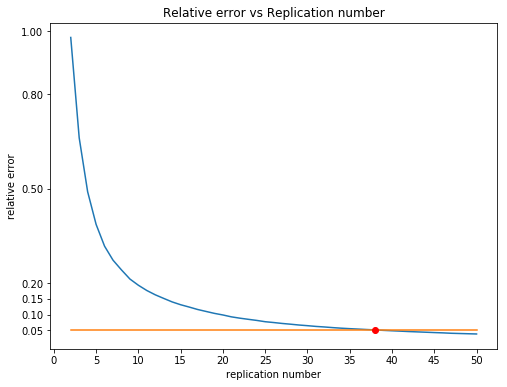

The proper replication number to control the relative error within 5% is:  38


In [5]:
horizon = []
for i in range(n-1):
    horizon.append(0.05)
    
plt.figure(figsize=(8,6))
plt.plot(repsNum, re, '-')
plt.plot(repsNum, horizon, '-')
plt.xlabel('replication number')
plt.ylabel('relative error')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.yticks([0.05,0.1,0.15,0.2,0.5,0.8,1.0])
plt.title('Relative error vs Replication number')
idx = np.argwhere(np.diff(np.sign(np.array(re) - np.array(horizon)))).flatten()
plt.plot(np.array(repsNum)[idx], np.array(re)[idx], 'ro')
plt.show()
print('The proper replication number to control the relative error within 5% is: ', np.array(repsNum)[idx][0])

# NBinomial n=40, p=0.625

In [6]:
def Service_Time(Item_Num):
    # service time ~ normal distribution
    ServiceTime = abs(np.random.normal(1/10*Item_Num + 3))
    return ServiceTime

# number of items ~ negative binomial distribution
def ItemNum3():
    return np.random.negative_binomial(40, 0.625)

def Arrival():
    SimFunctions.Schedule(Calendar,"Arrival",SimRNG.Expon(MeanTBA, 1))
    Customer = SimClasses.Entity()
    NumQueue_list = []
    for i in range(6):
        NumQueue_list.append(TheQueues[i].NumQueue())   
    min_index = NumQueue_list.index(min(NumQueue_list))
    TheQueues[min_index].Add(Customer)

    if TheResources[min_index].Busy == 0:
        TheResources[min_index].Seize(1)
        SimFunctions.Schedule(Calendar,"EndOfService"+str(min_index+1),Service_Time(ItemNum3()))

def EndOfService1():
    global Total_Customer1
    Total_Customer1 += 1
    DepartingCustomer1 = Queue1.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer1.CreateTime)
    if Queue1.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService1",Service_Time(ItemNum3()))
    else:
        Server1.Free(1)
        
def EndOfService2():
    global Total_Customer2
    Total_Customer2 += 1
    DepartingCustomer2 = Queue2.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer2.CreateTime)
    if Queue2.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService2",Service_Time(ItemNum3()))
    else:
        Server2.Free(1)
    
def EndOfService3():
    global Total_Customer3
    Total_Customer3 += 1
    DepartingCustomer3 = Queue3.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer3.CreateTime)
    if Queue3.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService3",Service_Time(ItemNum3()))
    else:
        Server3.Free(1)
    
def EndOfService4():
    global Total_Customer4
    Total_Customer4 += 1
    DepartingCustomer4 = Queue4.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer4.CreateTime)
    if Queue4.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService4",Service_Time(ItemNum3()))
    else:
        Server4.Free(1)
    
def EndOfService5():
    global Total_Customer5
    Total_Customer5 += 1
    DepartingCustomer5 = Queue5.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer5.CreateTime)
    if Queue5.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService5",Service_Time(ItemNum3()))
    else:
        Server5.Free(1)
    
def EndOfService6():
    global Total_Customer6
    Total_Customer6 += 1
    DepartingCustomer6 = Queue6.Remove()
    Wait.Record(SimClasses.Clock - DepartingCustomer6.CreateTime)
    if Queue6.NumQueue() > 0:
        SimFunctions.Schedule(Calendar,"EndOfService6",Service_Time(ItemNum3()))
    else:
        Server6.Free(1)
        
ZSimRNG = SimRNG.InitializeRNSeed()
Queue1 = SimClasses.FIFOQueue()
Queue2 = SimClasses.FIFOQueue()
Queue3 = SimClasses.FIFOQueue()
Queue4 = SimClasses.FIFOQueue()
Queue5 = SimClasses.FIFOQueue()
Queue6 = SimClasses.FIFOQueue()

Wait = SimClasses.DTStat()
Server1 = SimClasses.Resource()
Server2 = SimClasses.Resource()
Server3 = SimClasses.Resource()
Server4 = SimClasses.Resource()
Server5 = SimClasses.Resource()
Server6 = SimClasses.Resource()

Calendar = SimClasses.EventCalendar()

TheCTStats = []
TheDTStats = []
TheQueues = []
AllStats = []
TheResources = []

TheDTStats.append(Wait)
TheQueues.append(Queue1)
TheQueues.append(Queue2)
TheQueues.append(Queue3)
TheQueues.append(Queue4)
TheQueues.append(Queue5)
TheQueues.append(Queue6)
TheResources.append(Server1)
TheResources.append(Server2)
TheResources.append(Server3)
TheResources.append(Server4)
TheResources.append(Server5)
TheResources.append(Server6)

Server1.SetUnits(1)
Server2.SetUnits(1)
Server3.SetUnits(1)
Server4.SetUnits(1)
Server5.SetUnits(1)
Server6.SetUnits(1)

MeanTBA = 1.0 #a customer will arrive every 1 min
T = 840 # 8AM-10PM=14hrs
n = 50
mean = 0
Sum = 0
re = []
repsNum = []

for reps in range(2,n+1,1):
    Total_Customer1 = 0
    Total_Customer2 = 0
    Total_Customer3 = 0
    Total_Customer4 = 0
    Total_Customer5 = 0
    Total_Customer6 = 0

    SimFunctions.SimFunctionsInit(Calendar,TheQueues,TheCTStats,TheDTStats,TheResources)
    SimFunctions.Schedule(Calendar,"Arrival",SimRNG.Expon(MeanTBA, 1))
    SimFunctions.Schedule(Calendar,"EndSimulation",T)
    NextEvent = Calendar.Remove()
    SimClasses.Clock = NextEvent.EventTime

    if NextEvent.EventType == "Arrival":
        Arrival()
    elif NextEvent.EventType == "EndOfService1":
        EndOfService1()
    elif NextEvent.EventType == "EndOfService2":
        EndOfService2()
    elif NextEvent.EventType == "EndOfService3":
        EndOfService3()
    elif NextEvent.EventType == "EndOfService4":
        EndOfService4()
    elif NextEvent.EventType == "EndOfService5":
        EndOfService5()
    elif NextEvent.EventType == "EndOfService6":
        EndOfService6()

    while NextEvent.EventType != "EndSimulation":
        NextEvent = Calendar.Remove()
        SimClasses.Clock = NextEvent.EventTime
        if NextEvent.EventType == "Arrival":
            Arrival()
        elif NextEvent.EventType == "EndOfService1":
            EndOfService1()
        elif NextEvent.EventType == "EndOfService2":
            EndOfService2()
        elif NextEvent.EventType == "EndOfService3":
            EndOfService3()
        elif NextEvent.EventType == "EndOfService4":
            EndOfService4()
        elif NextEvent.EventType == "EndOfService5":
            EndOfService5()
        elif NextEvent.EventType == "EndOfService6":
            EndOfService6()
    AllWaits.append(Wait.Mean())
    diff = np.mean(AllWaits[-1]) - mean
    mean = mean + diff / reps
    Sum = Sum + diff * (np.mean(AllWaits[0:reps]) - mean)
    std = math.sqrt(Sum / (reps - 1))
    repsNum.append(reps)
    re.append(1.96*std / math.sqrt(reps) / np.mean(AllWaits[0:reps]))
print('The mean waiting time is:', mean)

The mean waiting time is: 9.605020610452453


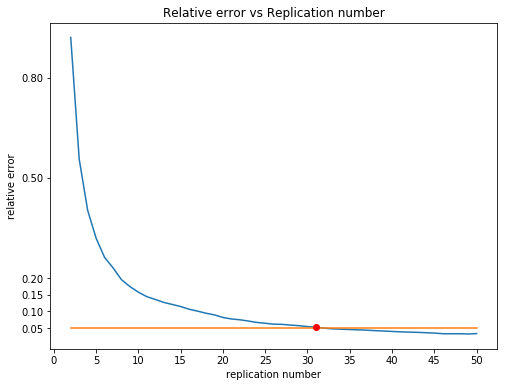

The proper replication number to control the relative error within 5% is:  31


In [7]:
horizon = []
for i in range(n-1):
    horizon.append(0.05)
    
plt.figure(figsize=(8,6))
plt.plot(repsNum, re, '-')
plt.plot(repsNum, horizon, '-')
plt.xlabel('replication number')
plt.ylabel('relative error')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.yticks([0.05,0.1,0.15,0.2,0.5,0.8,1.0])
plt.title('Relative error vs Replication number')
idx = np.argwhere(np.diff(np.sign(np.array(re) - np.array(horizon)))).flatten()
plt.plot(np.array(repsNum)[idx], np.array(re)[idx], 'ro')
plt.show()
print('The proper replication number to control the relative error within 5% is: ', np.array(repsNum)[idx][0])